In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.dates as mdates
from matplotlib.ticker import FuncFormatter
import plotly.express as px
import plotly.graph_objects as go
import warnings
warnings.filterwarnings("ignore")

In [2]:
df = pd.read_csv(filepath_or_buffer="data\DataCoSupplyChainDataset.csv",encoding="latin-1")

In [3]:
df.shape

(180519, 53)

In [4]:
df.head()

,Type,Days for shipping (real),Days for shipment (scheduled),Benefit per order,Sales per customer,Delivery Status,Late_delivery_risk,Category Id,Category Name,Customer City,...,Order Zipcode,Product Card Id,Product Category Id,Product Description,Product Image,Product Name,Product Price,Product Status,shipping date (DateOrders),Shipping Mode
0,DEBIT,3,4,91.250000,314.640015,Advance shipping,0,73,Sporting Goods,Caguas,...,NaN,1360,73,NaN,http://images.acmesports.sports/Smart+watch,Smart watch,327.75,0,2/3/2018 22:56,Standard Class
1,TRANSFER,5,4,-249.089996,311.359985,Late delivery,1,73,Sporting Goods,Caguas,...,NaN,1360,73,NaN,http://images.acmesports.sports/Smart+watch,Smart watch,327.75,0,1/18/2018 12:27,Standard Class
2,CASH,4,4,-247.779999,309.720001,Shipping on time,0,73,Sporting Goods,San Jose,...,NaN,1360,73,NaN,http://images.acmesports.sports/Smart+watch,Smart watch,327.75,0,1/17/2018 12:06,Standard Class
3,DEBIT,3,4,22.860001,304.809998,Advance shipping,0,73,Sporting Goods,Los Angeles,...,NaN,1360,73,NaN,http://images.acmesports.sports/Smart+watch,Smart watch,327.75,0,1/16/2018 11:45,Standard Class
4,PAYMENT,2,4,134.210007,298.250000,Advance shipping,0,73,Sporting Goods,Caguas,...,NaN,1360,73,NaN,http://images.acmesports.sports/Smart+watch,Smart watch,327.75,0,1/15/2018 11:24,Standard Class


In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 180519 entries, 0 to 180518
Data columns (total 53 columns):
 #   Column                         Non-Null Count   Dtype  
---  ------                         --------------   -----  
 0   Type                           180519 non-null  object 
 1   Days for shipping (real)       180519 non-null  int64  
 2   Days for shipment (scheduled)  180519 non-null  int64  
 3   Benefit per order              180519 non-null  float64
 4   Sales per customer             180519 non-null  float64
 5   Delivery Status                180519 non-null  object 
 6   Late_delivery_risk             180519 non-null  int64  
 7   Category Id                    180519 non-null  int64  
 8   Category Name                  180519 non-null  object 
 9   Customer City                  180519 non-null  object 
 10  Customer Country               180519 non-null  object 
 11  Customer Email                 180519 non-null  object 
 12  Customer Fname                

In [6]:
# Drop unnecessary columns, containing missing data
df.drop(columns=["Product Description", "Customer Lname",
                      "Customer Zipcode", "Order Zipcode",
                      "Customer Email", "Customer Password", 
                      "Product Image"],
                      inplace = True)
# Change the date-columns to the appropriate format
df["order date (DateOrders)"] = pd.to_datetime(df["order date (DateOrders)"])
df["shipping date (DateOrders)"] = pd.to_datetime(df["shipping date (DateOrders)"])

In [7]:
def reduce_mem_usage(df):
    """ iterate through all the columns of a dataframe and modify the data type
        to reduce memory usage.        
    """
    start_mem = df.memory_usage().sum() / 1024**2
    print("Memory usage of dataframe is {:.2f} MB".format(start_mem))
    
    for col in df.columns:
        col_type = df[col].dtype
        
        if col_type != "object" and col_type != "datetime64[ns]":
            c_min = df[col].min()
            c_max = df[col].max()
            if str(col_type)[:3] == "int":
                if c_min > np.iinfo(np.int8).min and c_max < np.iinfo(np.int8).max:
                    df[col] = df[col].astype(np.int8)
                elif c_min > np.iinfo(np.int16).min and c_max < np.iinfo(np.int16).max:
                    df[col] = df[col].astype(np.int16)
                elif c_min > np.iinfo(np.int32).min and c_max < np.iinfo(np.int32).max:
                    df[col] = df[col].astype(np.int32)
                elif c_min > np.iinfo(np.int64).min and c_max < np.iinfo(np.int64).max:
                    df[col] = df[col].astype(np.int64)  
            else:
                if c_min > np.finfo(np.float16).min and c_max < np.finfo(np.float16).max:
                    df[col] = df[col].astype(np.float16)
                elif c_min > np.finfo(np.float32).min and c_max < np.finfo(np.float32).max:
                    df[col] = df[col].astype(np.float32)
                else:
                    df[col] = df[col].astype(np.float64)
        elif col_type == "datetime64[ns]":  
            pass         
        
        else:
            df[col] = df[col].astype("category")

    end_mem = df.memory_usage().sum() / 1024**2
    print("Memory usage after optimization is: {:.2f} MB".format(end_mem))
    print("Decreased by {:.1f}%".format(100 * (start_mem - end_mem) / start_mem))
    
    return df

In [8]:
df = reduce_mem_usage(df)

Memory usage of dataframe is 63.35 MB


Memory usage after optimization is: 15.71 MB
Decreased by 75.2%


In [9]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 180519 entries, 0 to 180518
Data columns (total 46 columns):
 #   Column                         Non-Null Count   Dtype         
---  ------                         --------------   -----         
 0   Type                           180519 non-null  category      
 1   Days for shipping (real)       180519 non-null  int8          
 2   Days for shipment (scheduled)  180519 non-null  int8          
 3   Benefit per order              180519 non-null  float16       
 4   Sales per customer             180519 non-null  float16       
 5   Delivery Status                180519 non-null  category      
 6   Late_delivery_risk             180519 non-null  int8          
 7   Category Id                    180519 non-null  int8          
 8   Category Name                  180519 non-null  category      
 9   Customer City                  180519 non-null  category      
 10  Customer Country               180519 non-null  category      
 11  

In [10]:
df.head()

,Type,Days for shipping (real),Days for shipment (scheduled),Benefit per order,Sales per customer,Delivery Status,Late_delivery_risk,Category Id,Category Name,Customer City,...,Order Region,Order State,Order Status,Product Card Id,Product Category Id,Product Name,Product Price,Product Status,shipping date (DateOrders),Shipping Mode
0,DEBIT,3,4,91.250000,314.75,Advance shipping,0,73,Sporting Goods,Caguas,...,Southeast Asia,Java Occidental,COMPLETE,1360,73,Smart watch,327.75,0,2018-02-03 22:56:00,Standard Class
1,TRANSFER,5,4,-249.125000,311.25,Late delivery,1,73,Sporting Goods,Caguas,...,South Asia,Rajastán,PENDING,1360,73,Smart watch,327.75,0,2018-01-18 12:27:00,Standard Class
2,CASH,4,4,-247.750000,309.75,Shipping on time,0,73,Sporting Goods,San Jose,...,South Asia,Rajastán,CLOSED,1360,73,Smart watch,327.75,0,2018-01-17 12:06:00,Standard Class
3,DEBIT,3,4,22.859375,304.75,Advance shipping,0,73,Sporting Goods,Los Angeles,...,Oceania,Queensland,COMPLETE,1360,73,Smart watch,327.75,0,2018-01-16 11:45:00,Standard Class
4,PAYMENT,2,4,134.250000,298.25,Advance shipping,0,73,Sporting Goods,Caguas,...,Oceania,Queensland,PENDING_PAYMENT,1360,73,Smart watch,327.75,0,2018-01-15 11:24:00,Standard Class


In [11]:
df.isnull().sum().any()

False

In [12]:
market_sales = df.groupby("Market")["Sales"].sum().sort_values(ascending=False)
department_sales = df.groupby("Department Name",observed=False)["Sales"].sum().sort_values(ascending=True)

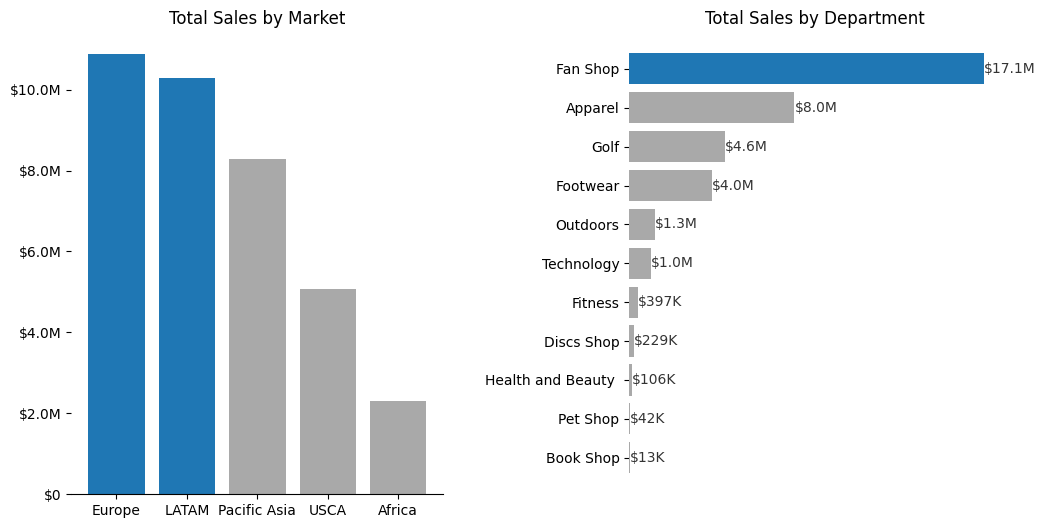

In [13]:
# Get the top markets and departments
top_markets = dict(sorted(market_sales.items(), key=lambda item: item[1], reverse=True)[:2])
top_department = 'Fan Shop'

# Define a currency formatter function
def currency_formatter(x, pos):
    if x >= 1e9:
        return "${:,.1f}B".format(x / 1e9)
    elif x >= 1e6:
        return "${:,.1f}M".format(x / 1e6)
    elif x >= 1e3:
        return "${:,.0f}K".format(x / 1e3)
    else:
        return "${:,.0f}".format(x)

# Create the figure and subplots
fig, ax = plt.subplots(nrows=1, ncols=2, figsize=(12, 6))

# Plot sales by market
for market, sales in market_sales.items():
    color = 'tab:blue' if market in top_markets else 'darkgrey'
    ax[0].bar(market, sales, color=color)

ax[0].set_title('Total Sales by Market')
ax[0].yaxis.set_major_formatter(FuncFormatter(currency_formatter))

# Plot sales by department
for department, sales in department_sales.items():
    color = 'tab:blue' if department == top_department else 'darkgrey'
    barh = ax[1].barh(department, sales, color=color)
    ax[1].text(sales, department, currency_formatter(sales, None),
               va='center', ha='left', color='black', alpha=0.8)

ax[1].set_title('Total Sales by Department')
ax[1].xaxis.set_major_formatter(FuncFormatter(currency_formatter))
ax[1].spines['bottom'].set_visible(False)
ax[1].xaxis.set_visible(False)

for axes in ax:
    axes.spines[['top', 'right', 'left']].set_visible(False)
    axes.set_axisbelow(True)

plt.subplots_adjust(wspace=0.5)
plt.show()

Europe and Latin America (LATAM) seem to be larger markets compared to all other regions combined.

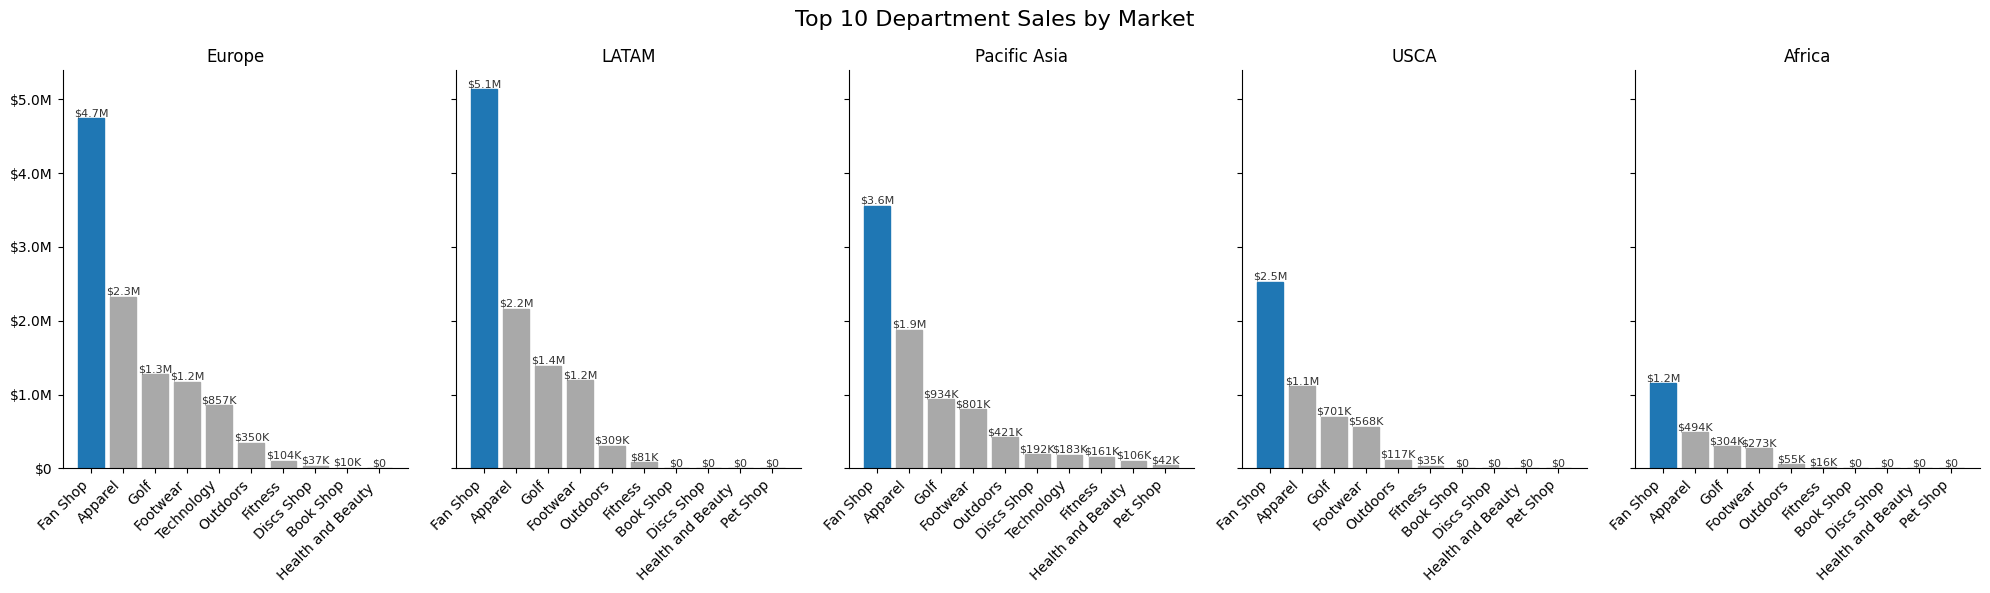

In [14]:
market_sales_idx = df.groupby('Market')['Sales'].sum().sort_values(ascending=False).index
total_sales_by_market_department = df.groupby(['Market','Department Name'])['Sales'].sum().reset_index()
top5_departments = total_sales_by_market_department.groupby('Market').apply(lambda x: x.nlargest(10, 'Sales')).reset_index(drop=True)
# Grafik oluştur
fig, axs = plt.subplots(nrows=1, ncols=5, figsize=(20, 6),sharey=True)

for ax, market in zip(axs, market_sales_idx):
    data = top5_departments[top5_departments['Market'] == market]
    max_sales_department = data.loc[data['Sales'].idxmax()]
    bars=ax.bar(data['Department Name'], data['Sales'])
    for bar in bars:
        if bar.get_height() == max_sales_department['Sales']:
            bar.set_color('tab:blue')
        else:
            bar.set_color('darkgray')
    
    
    #ax.set_xlabel('Sales')
    #ax.set_ylabel('Department Name')
    ax.set_title(market)
    ax.yaxis.set_major_formatter(FuncFormatter(currency_formatter))
    ax.spines[['top','right']].set_visible(False)
  

    for i, (index, row) in enumerate(data.iterrows()):
        # Use the index of the bar as the x-coordinate
        ax.text(i, row["Sales"], currency_formatter(row["Sales"],None), va='bottom', ha='center', color='black', alpha=0.8,fontsize=8)
    ax.set_axisbelow(False)
    ax.set_xticklabels(data['Department Name'], rotation=45, ha='right')
fig.suptitle("Top 10 Department Sales by Market",fontsize=16)
plt.tight_layout()
plt.show()



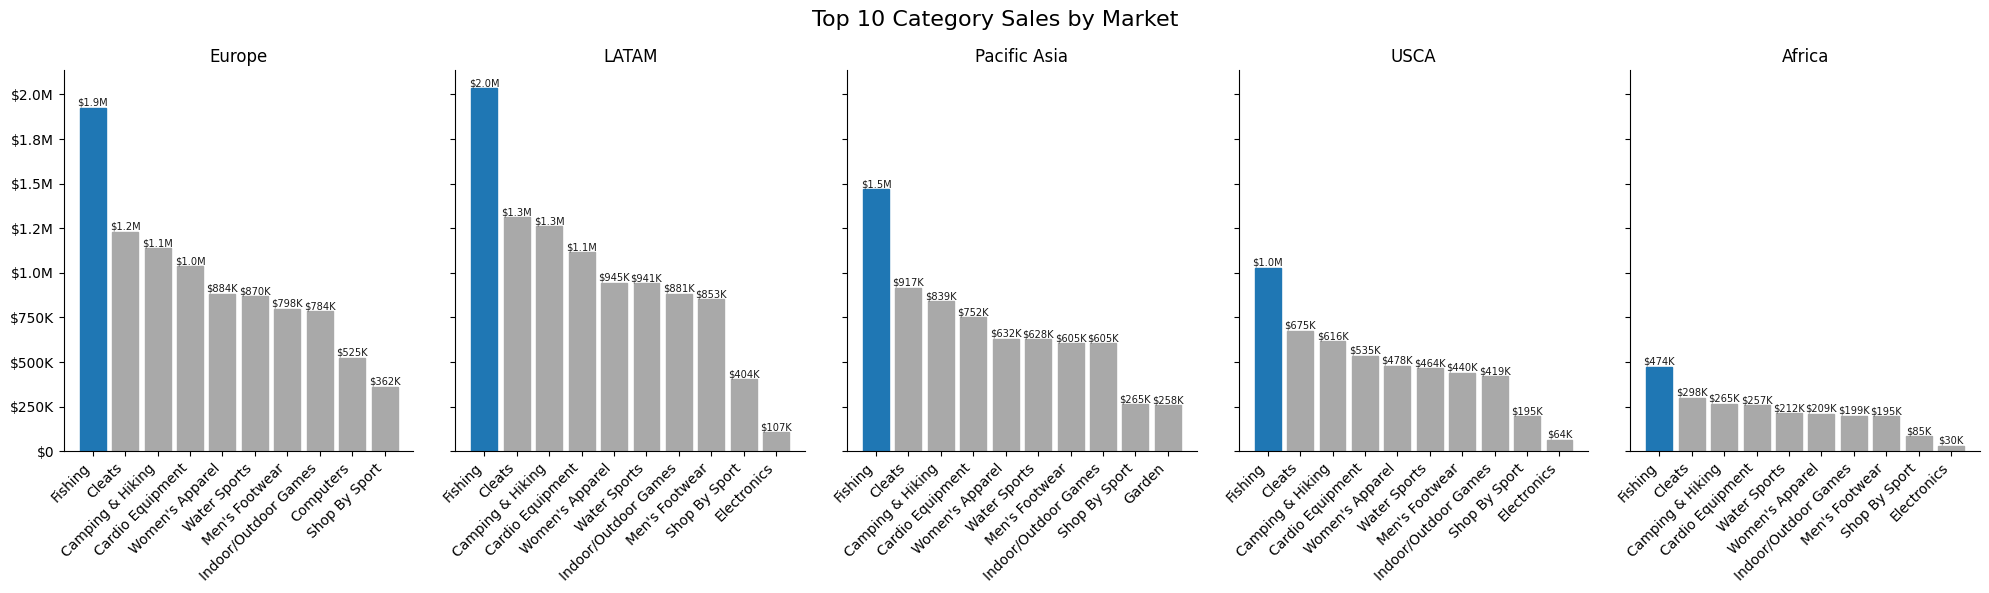

In [15]:
total_sales_by_market_category = df.groupby(['Market','Category Name'])['Sales'].sum().reset_index()

top5_departments = total_sales_by_market_category.groupby('Market').apply(lambda x: x.nlargest(10, 'Sales')).reset_index(drop=True)
# Grafik oluştur
fig, axs = plt.subplots(nrows=1, ncols=5, figsize=(20, 6),sharey=True)

for ax, market in zip(axs, market_sales_idx):
    data = top5_departments[top5_departments['Market'] == market]
    max_sales_category = data.loc[data['Sales'].idxmax()]
    bars=ax.bar(data['Category Name'], data['Sales'])
    for bar in bars:
        if bar.get_height() == max_sales_category['Sales']:
            bar.set_color('tab:blue')
        else:
            bar.set_color('darkgray')
    #ax.set_xlabel('Sales')
    #ax.set_ylabel('Department Name')
    ax.set_title(market)
    ax.yaxis.set_major_formatter(FuncFormatter(currency_formatter))
    ax.spines[['top','right']].set_visible(False)

    for i, (index, row) in enumerate(data.iterrows()):
        # Use the index of the bar as the x-coordinate
        ax.text(i, row["Sales"], currency_formatter(row["Sales"],None), va='bottom', ha='center', color='black', alpha=0.9,fontsize=7.1)
    ax.set_axisbelow(False)
    ax.set_xticklabels(data['Category Name'], rotation=45, ha='right')
fig.suptitle("Top 10 Category Sales by Market",fontsize=16)
plt.tight_layout()
plt.show()

Which product categories contribute the most to sales?

In [16]:
df.groupby('Product Name')['Order Item Quantity'].sum().sort_values(ascending=False)[:10]

Product Name
Perfect Fitness Perfect Rip Deck                 73698
Nike Men's Dri-FIT Victory Golf Polo             62956
O'Brien Men's Neoprene Life Vest                 57803
Nike Men's Free 5.0+ Running Shoe                36680
Under Armour Girls' Toddler Spine Surge Runni    31735
Nike Men's CJ Elite 2 TD Football Cleat          22246
Field & Stream Sportsman 16 Gun Fire Safe        17325
Pelican Sunstream 100 Kayak                      15500
Diamondback Women's Serene Classic Comfort Bi    13729
ENO Atlas Hammock Straps                           998
Name: Order Item Quantity, dtype: int64

In [17]:
def quantity_formatter(x,pos):
    if x >= 1e9:
        return "{:,.1f}B".format(x / 1e9)
    elif x >= 1e6:
        return "{:,.1f}M".format(x / 1e6)
    elif x >= 1e3:
        return "{:,.0f}K".format(x / 1e3)
    else:
        return "{:,.0f}".format(x)

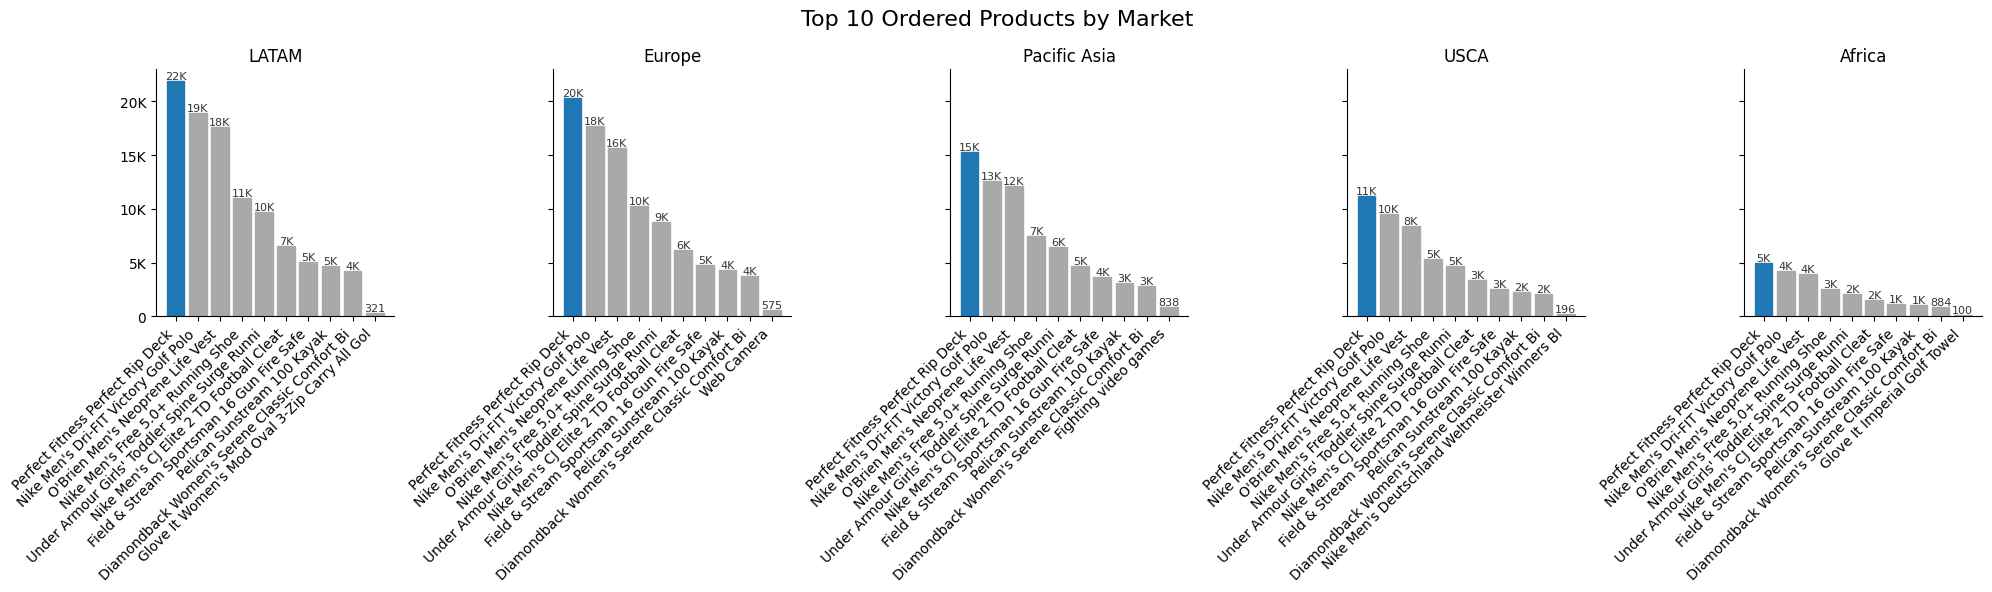

In [18]:
market_order_idx = df.groupby('Market')['Order Item Quantity'].sum().sort_values(ascending=False).index
total_order_by_market_product = df.groupby(['Market','Product Name'])['Order Item Quantity'].sum().reset_index()

top10_product = total_order_by_market_product.groupby('Market').apply(lambda x: x.nlargest(10, 'Order Item Quantity')).reset_index(drop=True)
# Grafik oluştur
fig, axs = plt.subplots(nrows=1, ncols=5, figsize=(20, 6),sharey=True)

for ax, market in zip(axs, market_order_idx):
    data = top10_product[top10_product['Market'] == market]
    max_order_product = data.loc[data['Order Item Quantity'].idxmax()]
    bars=ax.bar(data['Product Name'], data['Order Item Quantity'])
    for bar in bars:
        if bar.get_height() == max_order_product['Order Item Quantity']:
            bar.set_color('tab:blue')
        else:
            bar.set_color('darkgray')
    #ax.set_xlabel('Sales')
    #ax.set_ylabel('Department Name')
    ax.set_title(market)
    ax.yaxis.set_major_formatter(FuncFormatter(quantity_formatter))
    ax.spines[['top','right']].set_visible(False)

    for i, (index, row) in enumerate(data.iterrows()):
        # Use the index of the bar as the x-coordinate
        ax.text(i, row["Order Item Quantity"], quantity_formatter(row["Order Item Quantity"],None), va='bottom', ha='center', color='black', alpha=0.8,fontsize=8)
    ax.set_axisbelow(False)
    ax.set_xticklabels(data['Product Name'], rotation=45, ha='right')
fig.suptitle("Top 10 Ordered Products by Market",fontsize=16)
plt.tight_layout()
plt.show()

The 'Perfect Fitness Perfect Rip Deck' is the top-selling product in all markets. LATAM market shows higher performance in terms of order quantity compared to other markets.

In [21]:
df.columns

Index(['Type', 'Days for shipping (real)', 'Days for shipment (scheduled)',
       'Benefit per order', 'Sales per customer', 'Delivery Status',
       'Late_delivery_risk', 'Category Id', 'Category Name', 'Customer City',
       'Customer Country', 'Customer Fname', 'Customer Id', 'Customer Segment',
       'Customer State', 'Customer Street', 'Department Id', 'Department Name',
       'Latitude', 'Longitude', 'Market', 'Order City', 'Order Country',
       'Order Customer Id', 'order date (DateOrders)', 'Order Id',
       'Order Item Cardprod Id', 'Order Item Discount',
       'Order Item Discount Rate', 'Order Item Id', 'Order Item Product Price',
       'Order Item Profit Ratio', 'Order Item Quantity', 'Sales',
       'Order Item Total', 'Order Profit Per Order', 'Order Region',
       'Order State', 'Order Status', 'Product Card Id', 'Product Category Id',
       'Product Name', 'Product Price', 'Product Status',
       'shipping date (DateOrders)', 'Shipping Mode'],
      dtype='

In [49]:
#Top 10 Customer Cities by Total Sales
total_sales_by_city = df.groupby(['Market'])['Order Profit Per Order'].mean().sort_values(ascending=False)[:10].reset_index()

In [50]:
total_sales_by_city

,Market,Order Profit Per Order
0,Europe,23.271599
1,USCA,21.873575
2,LATAM,21.772261
3,Africa,21.703835
4,Pacific Asia,20.789026


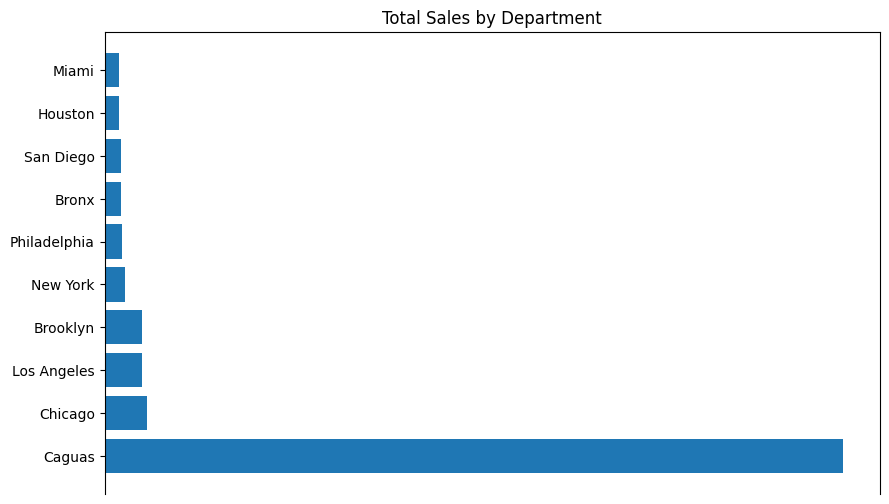

In [38]:
fig, axs = plt.subplots(figsize=(10, 6))
axs.barh(total_sales_by_city["Customer City"], total_sales_by_city["Order Item Quantity"])

# axs.text(total_sales_by_city["Sales"], total_sales_by_city["Customer City"], currency_formatter(total_sales_by_city["Sales"], None),
#               va='center', ha='left', color='black', alpha=0.8)

axs.set_title('Total Sales by Department')
axs.xaxis.set_major_formatter(FuncFormatter(currency_formatter))
axs.spines['bottom'].set_visible(False)
axs.xaxis.set_visible(False)

### Product Analysis

Which products are the best sellers and most profitable?

In [ ]:
best_selling_products = df.groupby("Product Name")["Sales"].sum().nlargest(10)
best_selling_products


Product Name
Field & Stream Sportsman 16 Gun Fire Safe        6930000.00
Perfect Fitness Perfect Rip Deck                 4421880.00
Diamondback Women's Serene Classic Comfort Bi    4118700.00
Nike Men's Free 5.0+ Running Shoe                3668000.00
Nike Men's Dri-FIT Victory Golf Polo             3147800.00
Pelican Sunstream 100 Kayak                      3100000.00
Nike Men's CJ Elite 2 TD Football Cleat          2891980.00
O'Brien Men's Neoprene Life Vest                 2888826.25
Under Armour Girls' Toddler Spine Surge Runni    1269400.00
Dell Laptop                                       663000.00
Name: Sales, dtype: float32

In [ ]:
df.groupby("Market")["Benefit per order"].mean().reset_index()

,Market,Benefit per order
0,Africa,21.703835
1,Europe,23.271599
2,LATAM,21.772261
3,Pacific Asia,20.789026
4,USCA,21.873575
